In [3]:
import sys
sys.path.append('..')
from settings import *
from fermiqp.lattice import *
import matplotlib.colors as colors

from fermiqp_style import set_theme
set_theme()

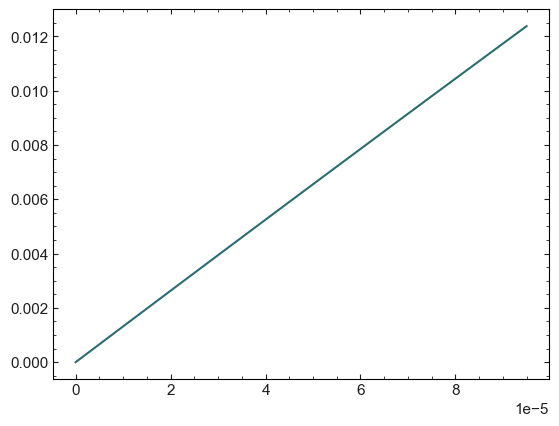

In [4]:
I = 30

OmegaR = 2*pi*8e4*I

gamma = 7e-6*2*pi*6e6

t = np.linspace(0, 20e-6, 10000)
dt = 5e-6
t = np.arange(20)*dt

y = 0.5*(1-np.cos(OmegaR*t)*np.exp(-gamma*t))

plt.plot(t, y)

# Calculation Raman Rabi rates for two beams at right angle


/Users/liyang/GitLab/fermiqp-physics/examples/../fermiqp/lattice.py:529: UserWarning: E-field calculation doesn't account for power
  warnings.warn("E-field calculation doesn't account for power")
/var/folders/39/7zvqwx812jq46_02fv74x1vr0000gn/T/ipykernel_49457/3408380274.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


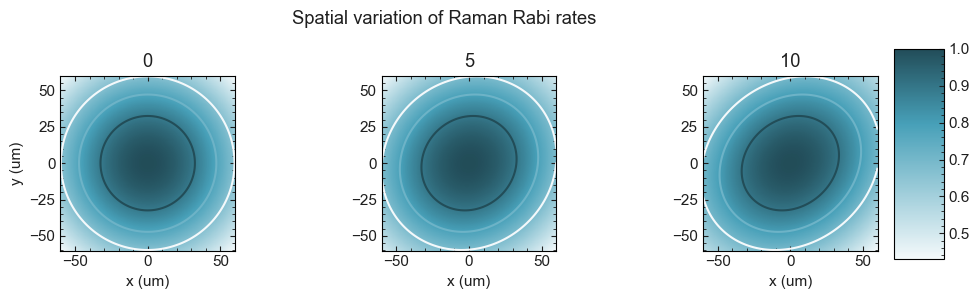

In [5]:
fig,axs = plt.subplots(1,3,figsize=(10,3))
angles = [0,5,10]

for i in range(len(angles)):
    angle = angles[i]
    ax=axs[i]
    rsc1 = GaussianBeam3D(
            waist=100e-6,
            wavelen=671e-9,
            prop_dir=[1,0,0],
            power=1
        )
    rsc2 = GaussianBeam3D(
            waist=100e-6,
            wavelen=671e-9,
            prop_dir=[np.sin(np.pi/180*angle),
                      np.cos(np.pi/180*angle),0],
            focuspos=[0,0,0],
            power=1
        )
    x = np.linspace(-60,60,500) * 1e-6
    X, Y = np.meshgrid(x, x)
    Z = 0.

    E1 = rsc1.field([X, Y, Z])
    E2 = rsc2.field([X, Y, Z])

    omega = np.abs(E1)*np.abs(E2) 


    im = ax.pcolormesh(X * 1e6, Y * 1e6, omega/np.max(omega), vmin=None, vmax=None)
    ax.contour(X*1e6,Y*1e6,omega/np.max(omega),levels=[0.7,0.8,0.9])
    ax.set_aspect(1.0, adjustable='box')
    ax.set_title(angle)
    # plt.colorbar(plt.gca(),label=r"relative rabi $\Omega_R$")
    ax.set_xlabel('x (um)')
    if i ==0:
        ax.set_ylabel('y (um)')
plt.suptitle('Spatial variation of Raman Rabi rates')

cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.tight_layout()
# plt.imshow(abs(E1),cmap='RdBu_r')


# Misalignment

I simulate the effect of misalingning the beams in position. The decoherence is drastic and pretty close to what we see in the experiment.

In [6]:
from matplotlib.patches import Circle

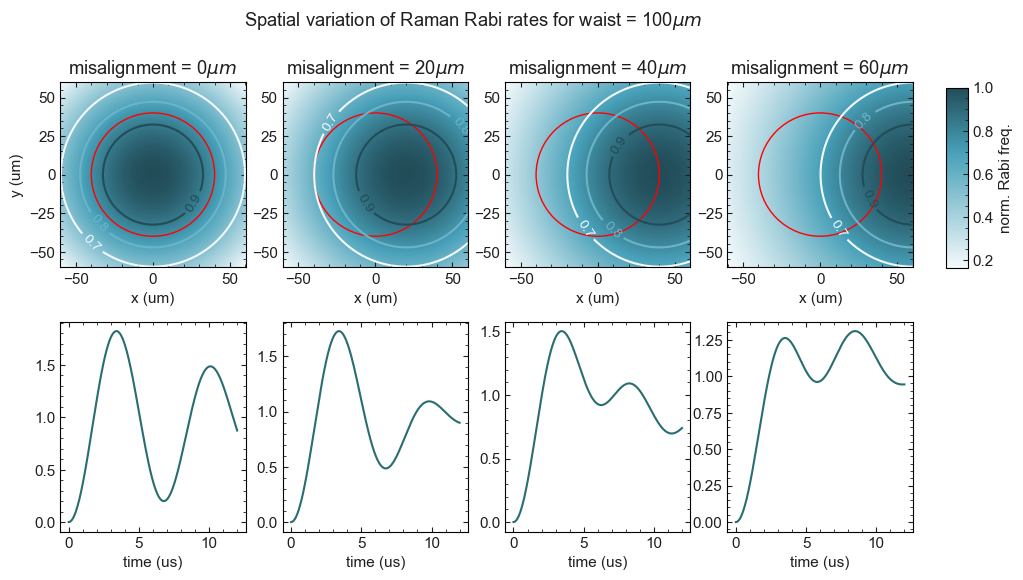

In [7]:
fig,axs = plt.subplots(2,4,figsize=(11,6))
positions = [0,20,40,60]
waist = 100e-6
select_radius = 40e-6

for i in range(len(positions)):
    shift = positions[i]*1e-6
    ax=axs[0][i]
    rsc1 = GaussianBeam3D(
            waist=waist,
            wavelen=671e-9,
            prop_dir=[1,0,0],
            power=1
        )
    rsc2 = GaussianBeam3D(
            waist=waist,
            wavelen=671e-9,
            prop_dir=[0,1,0],
            focuspos=[shift,0,0],
            power=1
        )
    x = np.linspace(-60,60,500) * 1e-6
    X, Y = np.meshgrid(x, x)
    Z = 0.

    E1 = rsc1.field([X, Y, Z])
    E2 = rsc2.field([X, Y, Z])

    omega = np.abs(E1)*np.abs(E2) 


    im = ax.pcolormesh(X * 1e6, Y * 1e6, omega/np.max(omega), vmin=None, vmax=None)
    CS = ax.contour(X*1e6,Y*1e6,omega/np.max(omega),levels=[0.7,0.8,0.9])
    ax.clabel(CS, inline=1, fontsize=10)
    select_circle = Circle((0, 0), select_radius*1e6, facecolor='None', edgecolor='r', lw=1)
    ax.add_patch(select_circle)

    ax.set_aspect(1.0, adjustable='box')
    ax.set_title(f"misalignment = {shift*1e6:1.0f}$\\mu m$")
    # plt.colorbar(plt.gca(),label=r"relative rabi $\Omega_R$")
    ax.set_xlabel('x (um)')
    if i ==0:
        ax.set_ylabel('y (um)')

    ax=axs[1][i]
    time = np.linspace(0,12e-6,300)
    freq  = 100e3

    mask = np.where(np.sqrt(X**2 + Y**2) < select_radius, False,True)
    mask = np.where(np.sqrt(X**2 + Y**2) < select_radius, True,False)

    omega_norm = omega/np.max(omega)
    y = np.zeros(len(time))
    for i in range(len(time)):
        t=time[i]
        local_freq = freq*np.ma.masked_array(omega_norm,mask)
        y[i]=np.ma.sum(np.sin(2*np.pi*local_freq*t)**2)/local_freq.mask.sum()
    
    

    ax.plot(time*1e6,y,linestyle='-',marker="")
    ax.set_xlabel('time (us)')
    if i ==0:
        ax.set_ylabel('pop. transfer (a.u.)')
plt.suptitle(f'Spatial variation of Raman Rabi rates for waist = {waist*1e6:1.0f}$\\mu m$')

cbar_ax = fig.add_axes([0.93, 0.55, 0.02, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('norm. Rabi freq.')
# plt.tight_layout()
# plt.imshow(abs(E1),cmap='RdBu_r')


# repeat this for optimal waist 350um



c:\Users\robig\Documents\Code\fermiqp-physics\examples\..\lattice\opticallattice.py:527: UserWarning: E-field calculation doesn't account for power
  warnings.warn("E-field calculation doesn't account for power")


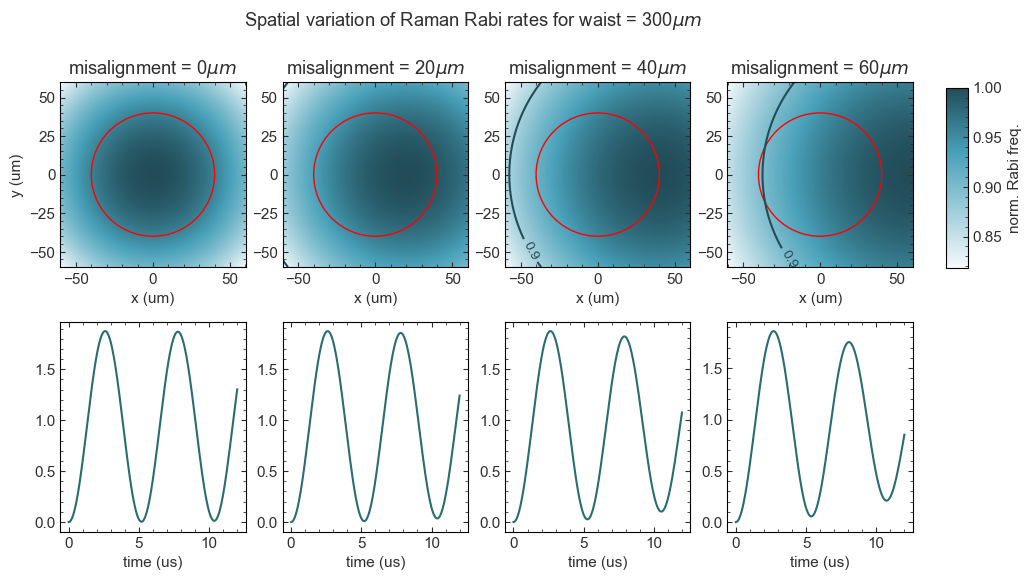

In [191]:
fig,axs = plt.subplots(2,4,figsize=(11,6))
positions = [0,20,40,60]
waist = 300e-6
select_radius = 40e-6

for i in range(len(positions)):
    shift = positions[i]*1e-6
    ax=axs[0][i]
    rsc1 = GaussianBeam3D(
            waist=waist,
            wavelen=671e-9,
            prop_dir=[1,0,0],
            power=1
        )
    rsc2 = GaussianBeam3D(
            waist=waist,
            wavelen=671e-9,
            prop_dir=[0,1,0],
            focuspos=[shift,0,0],
            power=1
        )
    x = np.linspace(-60,60,500) * 1e-6
    X, Y = np.meshgrid(x, x)
    Z = 0.

    E1 = rsc1.field([X, Y, Z])
    E2 = rsc2.field([X, Y, Z])

    omega = np.abs(E1)*np.abs(E2) 


    im = ax.pcolormesh(X * 1e6, Y * 1e6, omega/np.max(omega), vmin=None, vmax=None)
    CS = ax.contour(X*1e6,Y*1e6,omega/np.max(omega),levels=[0.7,0.8,0.9])
    ax.clabel(CS, inline=1, fontsize=10)
    select_circle = Circle((0, 0), select_radius*1e6, facecolor='None', edgecolor='r', lw=1)
    ax.add_patch(select_circle)

    ax.set_aspect(1.0, adjustable='box')
    ax.set_title(f"misalignment = {shift*1e6:1.0f}$\\mu m$")
    # plt.colorbar(plt.gca(),label=r"relative rabi $\Omega_R$")
    ax.set_xlabel('x (um)')
    if i ==0:
        ax.set_ylabel('y (um)')

    ax=axs[1][i]
    time = np.linspace(0,12e-6,300)
    freq  = 100e3

    mask = np.where(np.sqrt(X**2 + Y**2) < select_radius, False,True)
    mask = np.where(np.sqrt(X**2 + Y**2) < select_radius, True,False)

    omega_norm = omega/np.max(omega)
    y = np.zeros(len(time))
    for i in range(len(time)):
        t=time[i]
        local_freq = freq*np.ma.masked_array(omega_norm,mask)
        y[i]=np.ma.sum(np.sin(2*np.pi*local_freq*t)**2)/local_freq.mask.sum()
    
    

    ax.plot(time*1e6,y,linestyle='-',marker="")
    ax.set_xlabel('time (us)')
    if i ==0:
        ax.set_ylabel('pop. transfer (a.u.)')
plt.suptitle(f'Spatial variation of Raman Rabi rates for waist = {waist*1e6:1.0f}$\\mu m$')

cbar_ax = fig.add_axes([0.93, 0.55, 0.02, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('norm. Rabi freq.')
# plt.tight_layout()
# plt.imshow(abs(E1),cmap='RdBu_r')


In [164]:
import lmfit
from lmfit.models import LinearModel

180.0


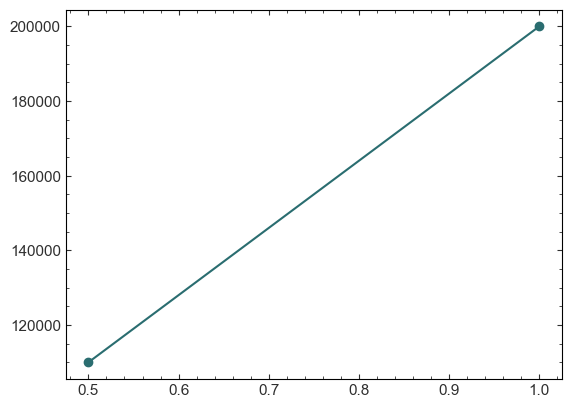

In [168]:
power = [0.5,1]
rabi = [110e3,200e3]
plt.scatter(power,rabi)
model=LinearModel()
res = model.fit(rabi, x=power,slope=100,intercept=0)
slope = res.params["slope"].value
plt.plot(power, res.best_fit, color=f"C0",linestyle='-',marker='')
print(slope/1e3)



Text(0.5, 0, 'Raman beam waist (1/e2)')

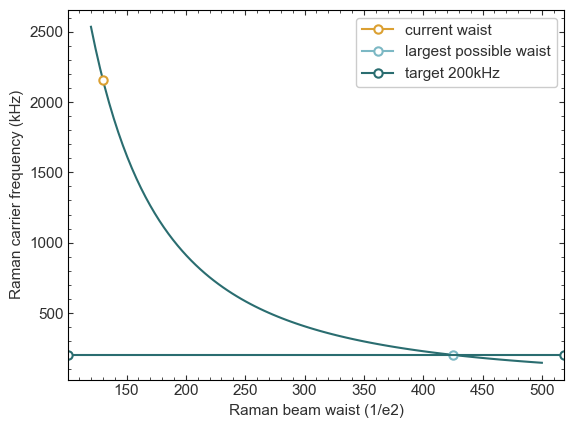

In [190]:
current_waist = 130
rabi_per_mW = 180 #kHz/mW
power = 12 #mW
waist = np.linspace(120,500,100)
def rabi(waist):
    return rabi_per_mW*power/(waist/current_waist)**2
plt.plot(waist, rabi(waist),marker='')
plt.plot(current_waist,rabi(current_waist),marker='o', label='current waist')
plt.plot(425,rabi(425),marker='o', label='largest possible waist')

plt.axhline(200,label='target 200kHz')
plt.legend()
plt.ylabel('Raman carrier frequency (kHz)')
plt.xlabel('Raman beam waist (1/e2)')